In [8]:
!python -m nltk.downloader vader_lexicon


C:\Users\kriti\anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kriti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#IMPORTING ALL THE NECESSARY LIBRARIES

In [104]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [105]:
#extracting the data
data = pd.read_csv("C:/Users/kriti/OneDrive/Desktop/amazonproductreviews.csv")

In [106]:
print(data.head(30)) #printing first 30 rows of the dataset

                      id       asins   brand  \
0   AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
1   AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
2   AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
3   AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
4   AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
5   AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
6   AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
7   AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
8   AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
9   AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
10  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
11  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
12  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
13  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
14  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
15  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
16  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
17  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
18  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon   
19  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Am

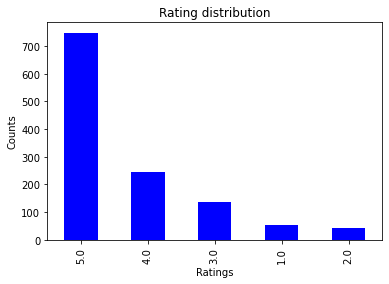

In [107]:
#plotting a graph for the rating column
ratings=data['rating'].value_counts().plot(kind='bar', title='Rating distrbution', color='blue')
plt.title('Rating distribution')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.show()

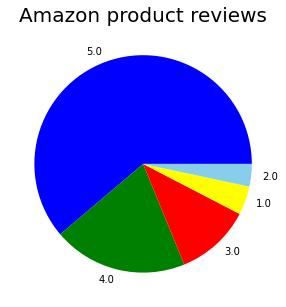

In [108]:
#pie chart 
ratings=data['rating'].value_counts()
quantity=ratings.values
numbers=ratings.index

colors=['blue','green','red','yellow','skyblue']
plt.figure(figsize=(5,5))
plt.pie(quantity, labels=numbers, colors=colors)
plt.title("Amazon product reviews", fontsize=20)
plt.show()

In [109]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kriti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
#removal of stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')



def remove_stopwords(feedback):
    if pd.isnull(feedback):  # Check if feedback is NaN
        return ''
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(feedback)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the 'feedback' column and store the result in a new column 'clean_feedback'
data['clean_feedback'] = data['feedback'].apply(remove_stopwords)

print(data.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kriti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kriti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                     id       asins   brand                  categories  \
0  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
1  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
2  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
3  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   
4  AVpe7AsMilAPnD_xQ78G  B00QJDU3KY  Amazon  Amazon Devices,mazon.co.uk   

  colors             dateAdded           dateUpdated  \
0    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
1    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
2    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
3    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   
4    NaN  2016-03-08T20:21:53Z  2017-07-18T23:52:58Z   

                  dimension  ean                         keys  ...  \
0  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
1  169 mm x 117 mm x 9.1 mm  NaN  kindlepaperwhite/b00qjdu3ky  ...   
2 

In [52]:
#using nltk, vader for sentiment analysis- categorizing into positive negative and neutral
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm   #add progress bars to loops
sia = SentimentIntensityAnalyzer()


In [53]:
#example
sia.polarity_scores('The product is very useful')


{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [ ]:
#neg= negative; neu=neutral, pos=positive

In [71]:

result = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    feedback = row['feedback']
    id = row['id']
    
    # Check if feedback is NaN
    if isinstance(feedback, str):
        result[id] = sia.polarity_scores(feedback)
    else:
        # Handle NaN case, for example, by assigning neutral sentiment
        result[id] = {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}


100%|████████████████████████████████████████████████████████████████████████████| 1597/1597 [00:00<00:00, 4329.05it/s]


In [78]:
pd.DataFrame(result).T

,neg,neu,pos,compound
AVpe7AsMilAPnD_xQ78G,0.000,0.196,0.804,0.6249
AVpfBEWcilAPnD_xTGb7,0.090,0.533,0.377,0.7906
AVpff7_VilAPnD_xc1E_,0.060,0.837,0.103,0.2677
AV00lzP7GV-KLJ3ac0uk,0.000,0.423,0.577,0.6249
AV1T0_7M-jtxr-f31CoX,0.000,0.741,0.259,0.6369
...,...,...,...,...
AVpgKkzMLJeJML43J5BV,0.066,0.453,0.480,0.9287
AVzRlqklGV-KLJ3aavB0,0.000,0.588,0.412,0.6369
AVpge-anilAPnD_xtDVf,0.270,0.730,0.000,-0.5719
AVpfODXeilAPnD_xXeUd,0.479,0.521,0.000,-0.5574


In [79]:
#merging the result with the data
vaders=pd.DataFrame(result).T
vaders=vaders.reset_index().rename(columns={'index': 'id'})
vaders=vaders.merge(data, how='left')
vaders.head()

,id,neg,neu,pos,compound,asins,brand,categories,colors,dateAdded,...,rating,reviews.sourceURLs,reviews.text,feedback,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,0.0,0.196,0.804,0.6249,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,0.0,0.196,0.804,0.6249,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,0.0,0.196,0.804,0.6249,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,0.0,0.196,0.804,0.6249,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,0.0,0.196,0.804,0.6249,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [155]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#tfidf term freq inverse document freq- no of occurences 
tfidf_vectorizer = TfidfVectorizer(max_features=100)
X = tfidf_vectorizer.fit_transform(data['clean_feedback'])
y = data['feedback']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

  (0, 70)	0.8505425697376345
  (0, 38)	0.525906205576718
  (1, 67)	0.5593806973201216
  (1, 81)	0.4477113897980796
  (1, 80)	0.4956311907111554
  (1, 28)	0.4909149312304208
  (2, 68)	0.43330200001739794
  (2, 29)	0.36393812891358596
  (2, 13)	0.4680052641820486
  (2, 93)	0.4654399836262394
  (2, 38)	0.4941003030192331
  (3, 96)	1.0
  (4, 82)	1.0
  (5, 84)	1.0
  (6, 85)	0.4396118587271675
  (6, 58)	0.43646509979860937
  (6, 1)	0.42224855909526016
  (6, 99)	0.20092009897693
  (6, 74)	0.3915880675386426
  (6, 45)	0.40224690241396627
  (6, 32)	0.20071722354035065
  (6, 63)	0.20529420237134227
  (7, 47)	0.414742425960621
  (7, 53)	0.414742425960621
  (7, 44)	0.3369211192415323
  :	:
  (1268, 19)	0.37292080318540594
  (1269, 96)	0.878162611394784
  (1269, 38)	0.47836223507745
  (1270, 80)	0.877173653327092
  (1270, 38)	0.48017328321013725
  (1271, 47)	0.414742425960621
  (1271, 53)	0.414742425960621
  (1271, 44)	0.3369211192415323
  (1271, 7)	0.37126003660047124
  (1271, 99)	0.22490043284688

In [174]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    cm = confusion_matrix(y_test, predictions)
    
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'Confusion Matrix:\n{cm}')



In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

# SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


ValueError: Input contains NaN

In [165]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

ValueError: Input contains NaN

In [176]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import svm


# Check for NaN values in X_train_imputed
if np.isnan(X_train_imputed).any():
    # If NaN values are present, handle them
    # For example, you can use SimpleImputer again to impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train_imputed)
    
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import svm

# Convert X_train_imputed to a numpy array if it's not already in that format
X_train_imputed = np.array(X_train_imputed)

# Check for NaN values in X_train_imputed
if np.isnan(X_train_imputed).any():
    # If NaN values are present, handle them
    # For example, you can use SimpleImputer again to impute missing values
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train_imputed)

# Check for NaN values in y_train
if np.isnan(y_train).any():
    # If NaN values are present, handle them accordingly
    # Here, we'll remove rows with NaN values
    nan_indices = np.argwhere(np.isnan(y_train)).flatten()
    X_train_imputed = np.delete(X_train_imputed, nan_indices, axis=0)
    y_train = np.delete(y_train, nan_indices)

# Initialize and train the SVM model
model = svm.SVC(kernel='rbf', C=30, gamma='auto')
model.fit(X_train_imputed, y_train)

# Calculate the accuracy score on the test data
accuracy = model.score(X_test_imputed, y_test)
print("Accuracy:", accuracy)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [147]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train a RandomForestClassifier 
#random forest-can be applied to both classification and regression tasks-constructing a multiple decision trees during 
#training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the 
#individual trees.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions on the testing set
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



AttributeError: lower not found

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have already loaded your data into a DataFrame called 'data'

# Split the data into features (X) and target variable (y)
X = data['feedback']
y = data['rating']


# parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [100, 500, 1000],
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20]
}

tfidf_vectorizer = TfidfVectorizer()

rf_classifier = RandomForestClassifier(random_state=40)

# Create a pipeline with TF-IDF vectorizer and Random Forest classifier
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', rf_classifier)
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Use the best estimator found by GridSearchCV to make predictions
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
